In [ ]:
#  from google.colab import drive
#  drive.mount('/content/drive')

# 🐶 End-to End Multiclass Dog Breed Classification

This notebook builds an end-to-end multiclass image classifier using Tensorflow 2.0 and TenserFlow Hub

## 1. Problem

Identifying the breed of dog given an image of dog.

## 2. Data

The data is used from Kaggle's dog breed identification Competition.

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some Information about data:

* We're dealing with images (Unstructured Data) so it's probably best to use deep learning/transfer learning.
* There are 120 breeds of dogs.
* There are around 10000+ images in the traning set.
(These images have labels)
* Tgere are around 10000+ images in the test set.
(These image shave no labels)


In [ ]:
# Unzip the uploaded data in google drive
# !unzip "/content/drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/My Drive/Dog Vision/"

### Get our Workspace Ready

* Import TensorFlow 2.x
* Import Tensorflow HUB
* Make sure using a GPU

In [ ]:
# Import necesary tools into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:", tf.__version__)
print("TH HUB Version:", hub.__version__)

# Check for GPU avalability
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "not available")

TF Version: 2.15.0
TH HUB Version: 0.15.0
GPU Available


## Getting our data ready (Turning into tensors)

With all machine learning models, our data has to be in mumerical format. So that what we'll be doing first. Turning our images into tensors

In [ ]:
# Checkout labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Dog Vision/labels.csv")
print (labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


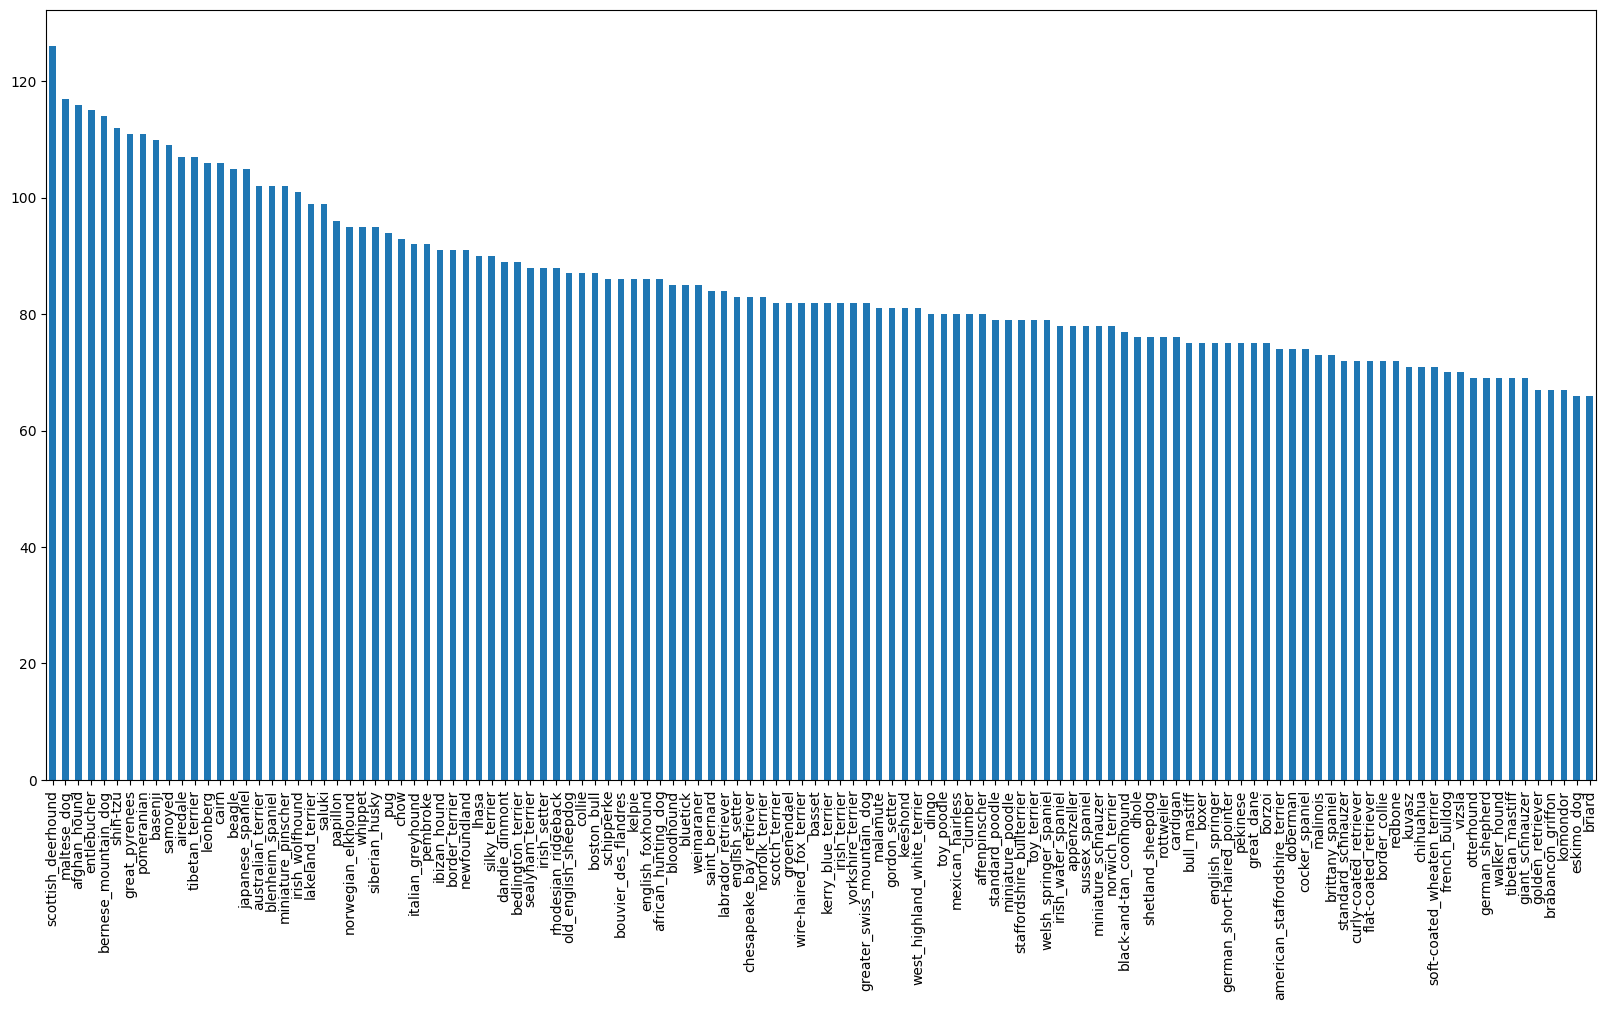

In [ ]:
# How many images are there of each bread ?
labels_csv["breed"].value_counts().plot.bar(figsize= (20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

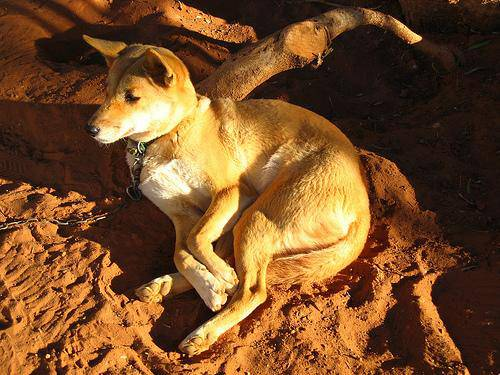

In [ ]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

###  Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create path name from image id
filenames = ["/content/drive/MyDrive/Dog Vision/train/" +fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check weather number of filenames with actual image files
import os
if len(os.listdir("/content/drive/My Drive/Dog Vision/train/")) == len (filenames):
  print("Filenames match actual amount.")
else:
  print("Filenames not match.")

Filenames match actual amount.


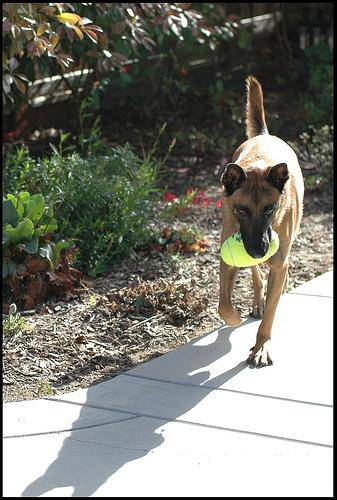

In [ ]:
# One more check
Image(filenames[9867])

In [ ]:
labels_csv["breed"][9867]

'malinois'

Since we've now got our traning images filepath ina list, let's prepare our labels

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # does same thing before
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
len(labels) == len(filenames)

True

In [ ]:
#  Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn Every labels into a boolean array
boolean_labels =[label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # Original label
print(np.where(unique_breeds == labels[0])) # index where label occures
print(boolean_labels[0].argmax()) # index where label occures in boolean array
print(boolean_labels[0].astype(int)) # there will be a1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

Since the datset doesn't have valid set, so we're going to create our own.

In [ ]:
# Setup X & y valiabels
X =filenames
y = boolean_labels

We're going to start off experimenting with ~ 1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES =1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation set
from sklearn.model_selection import train_test_split

# Split them into traning and validation of total size of NUM_IMAGES
X_train,X_valid,y_train,y_valid = train_test_split(X[:NUM_IMAGES],
                                                   y[:NUM_IMAGES],
                                                   test_size=0.2,
                                                   random_state=42)
len(X_train), len(y_train), len(X_valid), len(y_valid)

(800, 800, 200, 200)

## Making preprocessing Images (turning images into tensors)

1. Take an image filepath as input
2. Use tensorflow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` (convert colour channel value from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [ ]:
 # Convert image into numpy array
 from matplotlib.pyplot import imread
 image = imread(filenames[42])
 image.shape

(257, 350, 3)

In [ ]:
image.max()

255

In [ ]:
# Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define images size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Take an image file path and turns the image into a Tensors.
  """
  # Read in an inage file
  image = tf.io.read_file(image_path)
  # turn the jpg image into numerical Tensor with 3 colour channels (Red,Green,Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (244,244)
  image =tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches
Batch of 32 images at a time, so tranig process would be faster.

Rather Than 10000+ images in one go...

In [ ]:
# Create a function to return a tuple of Tensors (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  process the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
get_image_label(X[56], tf.constant(y[56]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.09611346, 0.127486  , 0.13925071],
         [0.11586135, 0.1472339 , 0.1570028 ],
         [0.1254902 , 0.15686275, 0.16470589],
         ...,
         [0.27342388, 0.3204827 , 0.31263956],
         [0.1869385 , 0.237849  , 0.23578337],
         [0.12296933, 0.17787129, 0.18179286]],
 
        [[0.14857192, 0.17994449, 0.19170919],
         [0.13661966, 0.1679922 , 0.17776112],
         [0.12358319, 0.15495573, 0.16279887],
         ...,
         [0.21952744, 0.26658627, 0.25874314],
         [0.14836068, 0.19927119, 0.19548607],
         [0.07632574, 0.1312277 , 0.13455527]],
 
        [[0.15000625, 0.1813788 , 0.19314352],
         [0.12458609, 0.15595864, 0.16572754],
         [0.10998025, 0.14135279, 0.14919592],
         ...,
         [0.24469785, 0.2917567 , 0.28391355],
         [0.22872232, 0.2796328 , 0.27564135],
         [0.19307986, 0.24798182, 0.24856329]],
 
        ...,
 
        [[0.3036891 , 0.3633666 

Turning data X & y into batches

In [ ]:
# Define batch size
BATCH_SIZE =32

# Create a function to turn data into batches
def create_data_batches(X, y=None,batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and (y) pairs.
  Shuffles data if it's traning data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # if the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # only file path (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # if data is valid set, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                               tf.constant(y)))  #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating traning data batches...")

    # turn Filepathsand labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor
    data = data.shuffle(buffer_size=len(X))

    # Create image label tuples (this also turns the image path into preprocessed image)
    data= data.map(get_image_label)

    # Turning data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Creating traning and validation data batches
train_data =  create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_valid, y_valid, valid_data=True)

Creating traning data batches...
Creating validation data batches...


In [ ]:
# Check different attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our Data isnow in batches, however, these can be a little hard to understand/ comprehend , let's visualize them



In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """

  # Setup the figure
  plt.figure(figsize=(10,10))
  #Loop through 25 (for display 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
train_images,  train_labels = next(train_data.as_numpy_iterator())

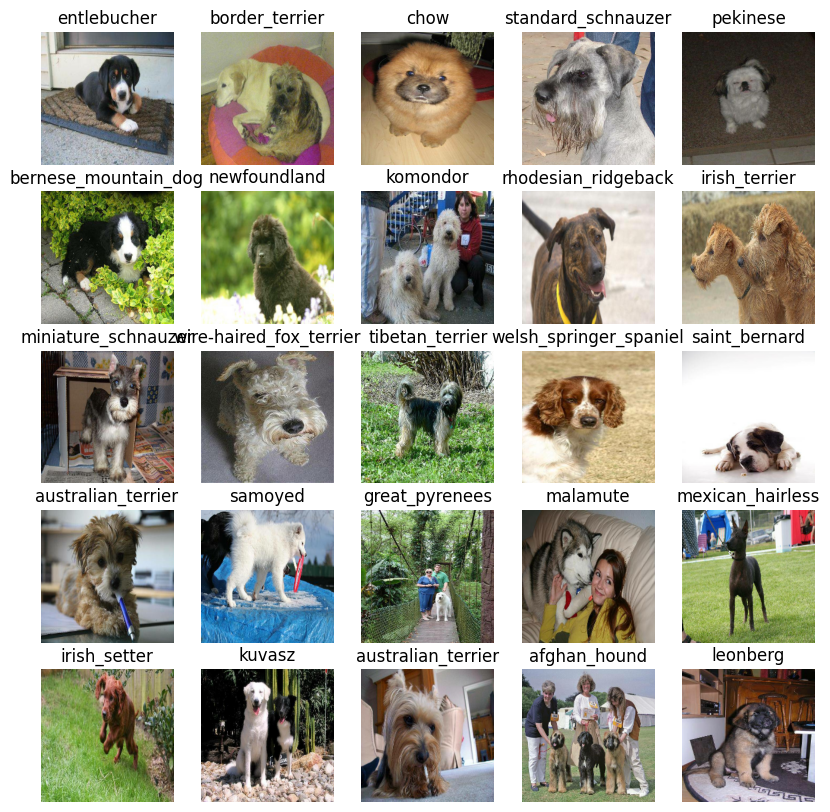

In [ ]:
# Now visualize the data in a traning batch
show_25_images(train_images,train_labels)

## Bulding a model

Before we build a model, there are few things wwe need to define:
* The input shape (our images shape,in the form of tensors) to our model.
* The output shape (images labels, in the form of tensors) of our model.
* The URL of the model wewant to use.


In [ ]:
# Setup input of model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup output of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow HUB
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now our input, output and model ready to go.
Let's put them together into a keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* define the layer in a keras model in sequential fashion
(do this first, then this, the that).
* Compiles the model(says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.



In [ ]:
# from keras.layers.attention.multi_head_attention import activation
# Create a function which build a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup Model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                         activation="softmax") # Layer2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model= create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks

callbacks are helper functions a model can use during traning to do such things as save its progress, check its progress or stop traning early if a model stops improving.

Creating two callbacks, one for TensorBoaed which helps track our models progess and another for early stopping which prevents our nodel from training for too long.

### TensorBoard Callback

To Setup tensorboard callback, we need to do 3 things:
1. Load the Tensorboard notebook extension.
2. Create a Tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our model traning logs with the `%tensorboard` magic function.


In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# Create a function to build Tensorboard callback
def create_tensorboard_callback():
  # Create log directory for storing tensorboard logs
  logdir = os.path.join("/content/drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callback

In [ ]:
# Craete early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Traning a model (on subset of data)

Our first model only train on 1000 images

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

In [ ]:
# Check to make sure it still  run on GPU
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "not available")

GPU Available


Let,s create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard Callback using `create_Tensorboard_callback()`
* Call the `fit()`function on our model passing it the traning data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks.
* Return the model

In [ ]:
# Build a function to train and return model
def train_model():
  """
  Train agiven model and return the trained version.
  """
  # create model
  model = create_model()

  # Create new Tensorboard session everytime during train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# model = train_model()

### Checking the TensorBoard logs

The Tensorboard magic function(`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [ ]:
# %tensorboard --logdir content/drive/MyDrive/Dog\ Vision/logs

## Making and evaluation predictions using a trained model

In [ ]:
valid_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Make prediction on validation data
predictions = model.predict(valid_data, verbose=1)
predictions

7/7 [==============================] - 9s 1s/step


array([[0.00160883, 0.07872663, 0.00439042, ..., 0.05110163, 0.00175243,
        0.00174052],
       [0.01157064, 0.00239146, 0.05651422, ..., 0.02076435, 0.00234858,
        0.00085856],
       [0.00339993, 0.00229927, 0.07896939, ..., 0.00012767, 0.00630334,
        0.00908647],
       ...,
       [0.01281819, 0.02290231, 0.03018359, ..., 0.01327406, 0.00579908,
        0.0060102 ],
       [0.00242795, 0.04247935, 0.00849956, ..., 0.00798889, 0.00213974,
        0.0049529 ],
       [0.00375708, 0.00089327, 0.00065093, ..., 0.00350124, 0.02212282,
        0.00112956]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
# First prediction
index= 42
print(predictions[index])
print(f"Max value (probability of prediction):{np.max(predictions[index])}")
print(f"SUM:{np.sum(predictions[index])}")
print(f"Max index:{np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[0.00946146 0.00542069 0.00842856 0.00870845 0.00444301 0.00201563
 0.01153384 0.00166746 0.04506521 0.00165923 0.00861501 0.00238001
 0.00062004 0.01160418 0.00056488 0.00295129 0.01810965 0.00324841
 0.00159288 0.00514167 0.01128046 0.00533847 0.00488742 0.00729242
 0.00260795 0.01113374 0.00697013 0.00851062 0.00780374 0.00156813
 0.03994865 0.00079933 0.01511209 0.00953112 0.00393649 0.00314646
 0.00921107 0.00803141 0.01564217 0.01576601 0.00308113 0.00285819
 0.00077904 0.00070046 0.0064741  0.03099467 0.00576354 0.00139334
 0.02725181 0.00122688 0.00063709 0.00416951 0.00299316 0.00942571
 0.01719579 0.01232195 0.0004041  0.00477577 0.02185352 0.01573279
 0.00146786 0.00393138 0.01702505 0.00150428 0.00329766 0.00144008
 0.00753914 0.00292567 0.0183597  0.01814903 0.00119303 0.00199345
 0.00602782 0.00173611 0.00619688 0.00370442 0.0038941  0.00103078
 0.00282371 0.00095288 0.00259877 0.00460546 0.00212327 0.016712
 0.00697249 0.00503135 0.00344221 0.00989263 0.00079927 0.001676

In [ ]:
unique_breeds[54]

'groenendael'

Having the above functonaliy is great but we want to be able to do it at scale.

And it would be better if we could see the image the prediction is being made on!

**NOTE:** prediction probabilities are also known as confidence level

In [ ]:
# Turn prediction probabilites into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turn array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'beagle'

In [ ]:
valid_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# create a function for unbatch a batched dataset
def unbatch(data):
  """
  take batched dataset and unbatch it for better visualization
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# unbatch the valid dataset
valid_images, valid_labels = unbatch(valid_data)
valid_images[0], valid_labels[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image  for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred labels
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

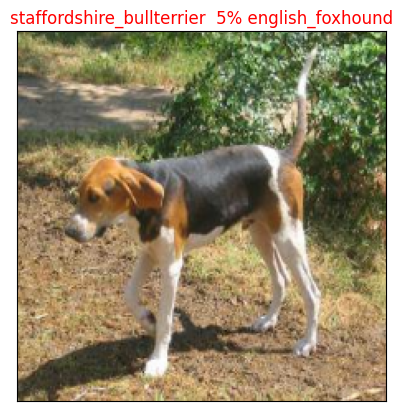

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=valid_labels,
          images=valid_images,
           n=42)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels ,n=1):
  """
  pluse the top 10 highest predictions confidences along with the truth labelfor sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the prediction label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                    top_10_pred_values,
                    color= "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
            labels=top_10_pred_labels,
            rotation="vertical")

  # Change color of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

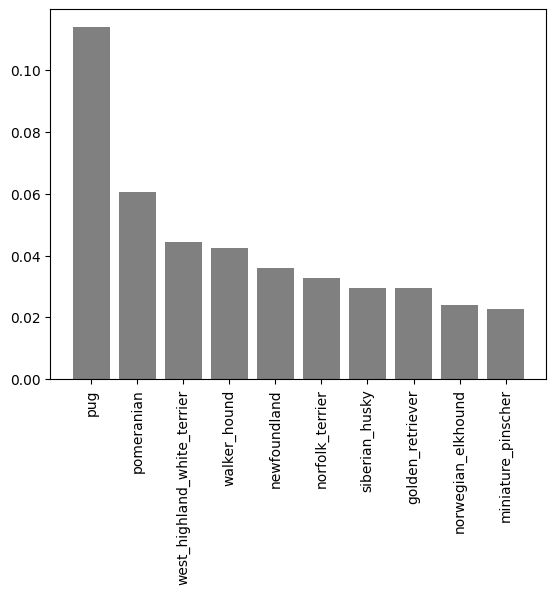

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=valid_labels,
               n=9)

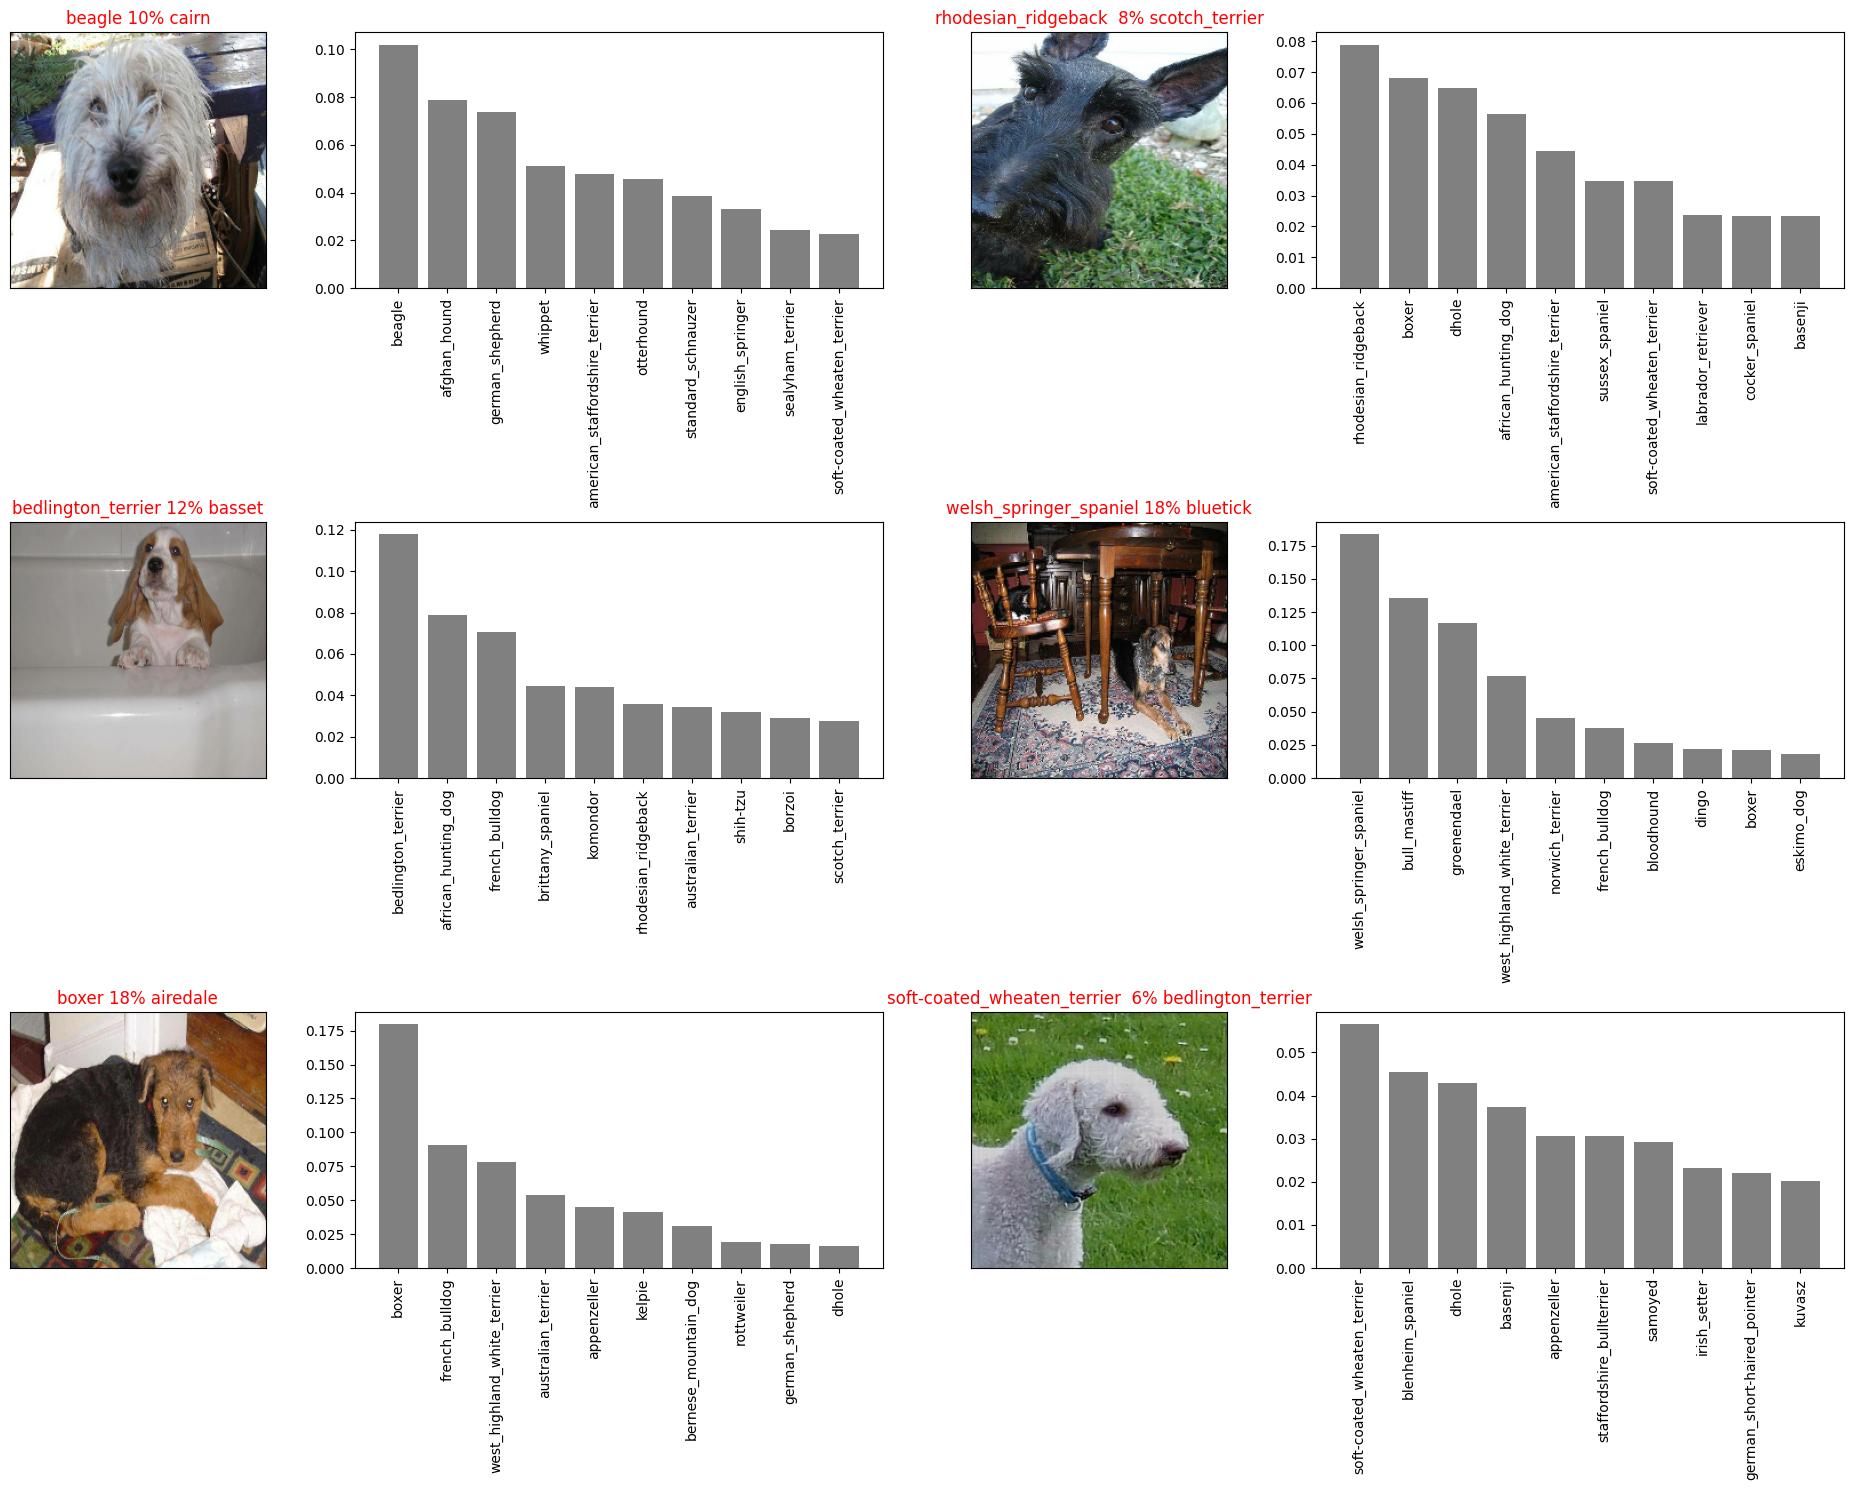

In [ ]:
# let's check out a few predictions and their different values

i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=valid_labels,
            images=valid_images,
            n= i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
            labels=valid_labels,
            n= i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [ ]:
# Create a function to train a model
def save_model(model, suffix=None):
  """
  Save a given model in a models directory
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "_" + suffix + ".h5" # Save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load trained model
def load_model(model_path):
  """
  Load A trained model
  """
  print(f"Loading saved modelfrom: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trainde on 1000 images
# save_model(model, suffix= "1000-images-moblenetv2-Adam")

In [ ]:
# Load a trained model
Loaded_1000_images_model= load_model('/content/drive/MyDrive/Dog Vision/models/20230929-17131696007630_1000-images-moblenetv2-Adam.h5')

Loading saved modelfrom: /content/drive/MyDrive/Dog Vision/models/20230929-17131696007630_1000-images-moblenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(valid_data)

7/7 [==============================] - 1s 76ms/step - loss: 5.7294 - accuracy: 0.0200


[5.729409217834473, 0.019999999552965164]

In [ ]:
# Evalaute the loaded model
Loaded_1000_images_model.evaluate(valid_data)

7/7 [==============================] - 2s 140ms/step - loss: 1.1897 - accuracy: 0.6850


[1.1896685361862183, 0.6850000023841858]

## Traning a model on full data

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# Create a data batch with full data set
full_data = create_data_batches(X, y)

Creating traning data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when train on full data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to full data
# full_model.fit(x=full_data,
              #  epochs=NUM_EPOCHS,
              #  callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
# save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
loaded_full_model= load_model('/content/drive/MyDrive/Dog Vision/models/20230930-05081696050496_full-image-set-mobilenetv2-Adam.h5')

Loading saved modelfrom: /content/drive/MyDrive/Dog Vision/models/20230930-05081696050496_full-image-set-mobilenetv2-Adam.h5


In [ ]:
len(X)

10222

## Making prediction on test data set

In [ ]:
# Load test image file name
test_path = "/content/drive/MyDrive/Dog Vision/test/"
test_filename = [test_path + fname for fname in os.listdir(test_path)]
test_filename[:10]


['/content/drive/MyDrive/Dog Vision/test/e7a1b7a42db97df750aeae212a02d9c4.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e1f9be3ecf0409189486c786ff4bd65a.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e4e57083c3b68e91760ce6f5fcd0a2f9.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e18fbb12037c297b90642e99073cd6b4.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e53cb5b42ea1a7700cd294a336890361.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e7b4b0e7d7d76f8dbd64920f34443b25.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e09a3a40b2ebdf0be72800eefd6931de.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e00e5f7f822fd670bba314f87cce8428.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e22d81ccf32bd590d8dd66815fd222b7.jpg',
 '/content/drive/MyDrive/Dog Vision/test/dcab2d03a686ab3f31d1bc3e5700f6d1.jpg']

In [ ]:
len(test_filename)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filename, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make prediction on test data batch
# test_predictions = loaded_full_model.predict(test_data,
                                            #  verbose=1)

In [ ]:
# Save predictions(NumPy array) to csv file(for access later)
np.savetxt("/content/drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog Vision/preds_array.csv", delimiter = ",")

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test images ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7a1b7a42db97df750aeae212a02d9c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e1f9be3ecf0409189486c786ff4bd65a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e4e57083c3b68e91760ce6f5fcd0a2f9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e18fbb12037c297b90642e99073cd6b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e53cb5b42ea1a7700cd294a336890361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add prediction probability to each dog bread column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7a1b7a42db97df750aeae212a02d9c4,1.887852e-09,4.449616e-09,4.684514e-10,6.824644e-10,3.062458e-09,1.345960e-11,8.837993e-11,9.693265e-10,1.783514e-09,...,1.974045e-10,1.447355e-10,1.206822e-10,3.387305e-09,1.496463e-11,5.422926e-11,1.947504e-05,7.097160e-09,2.274092e-05,1.405351e-09
1,e1f9be3ecf0409189486c786ff4bd65a,3.575288e-08,2.140998e-12,1.039927e-08,2.038801e-12,6.672009e-11,1.900942e-07,4.080943e-08,5.217210e-07,1.243219e-10,...,9.264988e-07,5.210195e-05,1.875872e-09,1.562831e-11,1.959603e-10,7.635481e-09,2.702224e-09,7.856234e-09,1.478201e-10,5.001486e-07
2,e4e57083c3b68e91760ce6f5fcd0a2f9,8.811757e-12,2.872617e-09,2.326256e-11,9.732021e-12,1.341754e-10,1.246634e-10,2.552267e-11,2.847356e-12,1.398038e-09,...,4.596979e-11,1.251654e-10,5.179876e-13,5.794703e-10,5.867915e-12,7.218606e-09,5.690709e-12,4.497450e-11,2.711677e-11,4.815761e-12
3,e18fbb12037c297b90642e99073cd6b4,8.266731e-08,4.436065e-09,2.872774e-08,1.445048e-08,7.553529e-06,5.162635e-10,9.657856e-01,1.578365e-06,1.044986e-08,...,7.368249e-08,2.550852e-06,8.634618e-09,1.420987e-09,7.412691e-09,2.846527e-08,2.983418e-06,3.627329e-09,1.226953e-06,3.298949e-02
4,e53cb5b42ea1a7700cd294a336890361,3.672238e-10,1.666001e-11,2.970649e-10,2.393730e-07,4.608597e-03,2.252907e-09,2.220942e-03,1.536703e-02,8.577195e-01,...,1.106192e-08,2.052723e-09,8.037760e-08,2.896146e-05,5.023303e-09,8.943366e-05,3.064739e-09,1.590272e-03,1.687114e-05,5.192898e-07


In [ ]:
# save our prediction df to csv
# preds_df.to_csv("/content/drive/MyDrive/Dog Vision/full_model_predictions_submission_1_mobilenetv2.csv",
                # index=False)

In [ ]:
# Get custom images filepath
custom_path = "/content/drive/MyDrive/Dog Vision/custom dog pic/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['/content/drive/MyDrive/Dog Vision/custom dog pic/1503385646-1024x1024.jpg',
 '/content/drive/MyDrive/Dog Vision/custom dog pic/1611003228941-98852ba62227.jpeg']

In [ ]:
# Turn custuom images into batches
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# make Predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 2s 2s/step


In [ ]:
custom_preds.shape

(2, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['dingo', 'golden_retriever']